In [12]:
import numpy as np
import sys

import gudhi as gd
import gudhi.representations

import networkx as nx
import itertools

import pandas as pd

sys.path.append('../')
from tools import plot_tools as myplt

import matplotlib.pyplot as plt

## Utility functions

In [3]:
def get_skeleton(data,max_edge_length):
    return gd.RipsComplex(points = data,
                          max_edge_length = max_edge_length)

def get_VRcomplex(skeleton,max_dim):
    return skeleton.create_simplex_tree(max_dimension = max_dim)

def get_barCode(VRcomplex):
    return VRcomplex.persistence()

## Simple PCD

In [4]:
path_file = '../datasets/samplePCD/'

files_list = [
    'data_00.txt', 
    'data_01.txt', 
    'data_02.txt', 
    'data_03.txt', 
    'data_04.txt'
]

dataSet = {
    'data_'+str(i): np.loadtxt(path_file+file, skiprows=1) for i,file in enumerate(files_list)
}

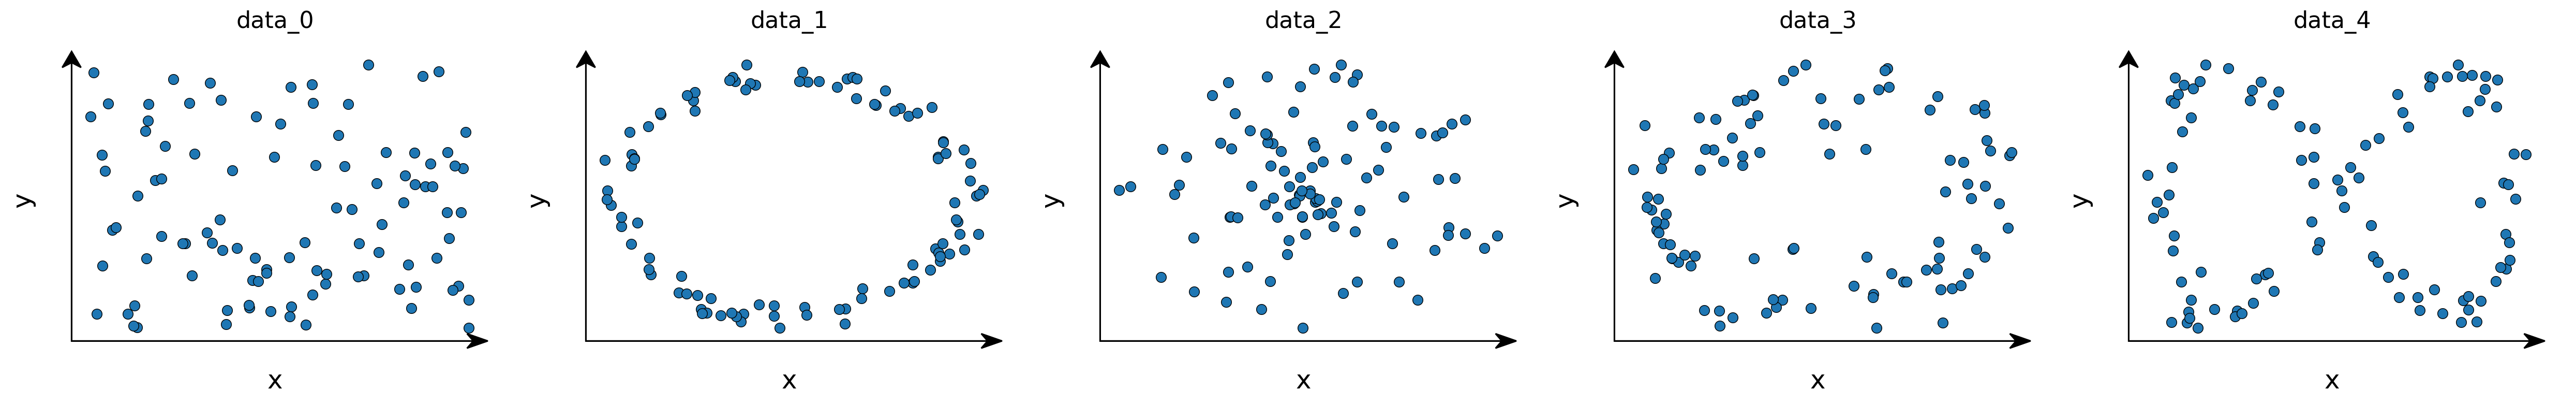

In [5]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(dataSet):
    myplt.single_scatter_axe(dataSet[j], ax[i], s=50)
    myplt.axarrows(fig,ax[i],labels=['x','y'])
    ax[i].set_title(r''+j, size=16)
fig.tight_layout()

In [6]:
MEL = 1.0
skeletons = {
    'sk_'+str(i): get_skeleton(dataSet[dset],MEL) for i,dset in enumerate(dataSet)
}

In [7]:
MAX_DIM = 2
VRcomplexes = {
    'VR_'+str(i): get_VRcomplex(skeletons[sk],MAX_DIM) for i,sk in enumerate(skeletons)
}

In [8]:
barCodes = {
    'brcd_'+str(i): get_barCode(VRcomplexes[vr]) for i,vr in enumerate(VRcomplexes)
}

usetex mode requires dvipng.


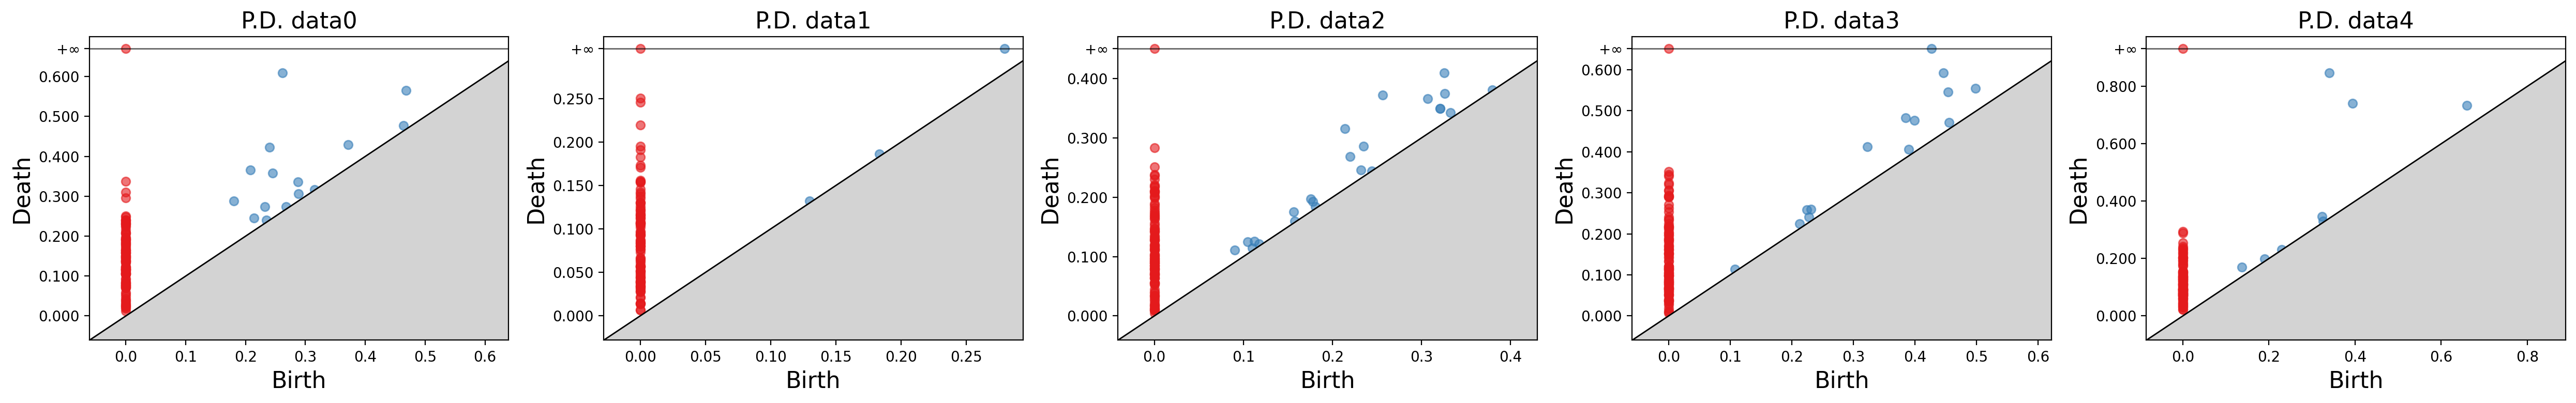

In [9]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_diagram(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.D. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

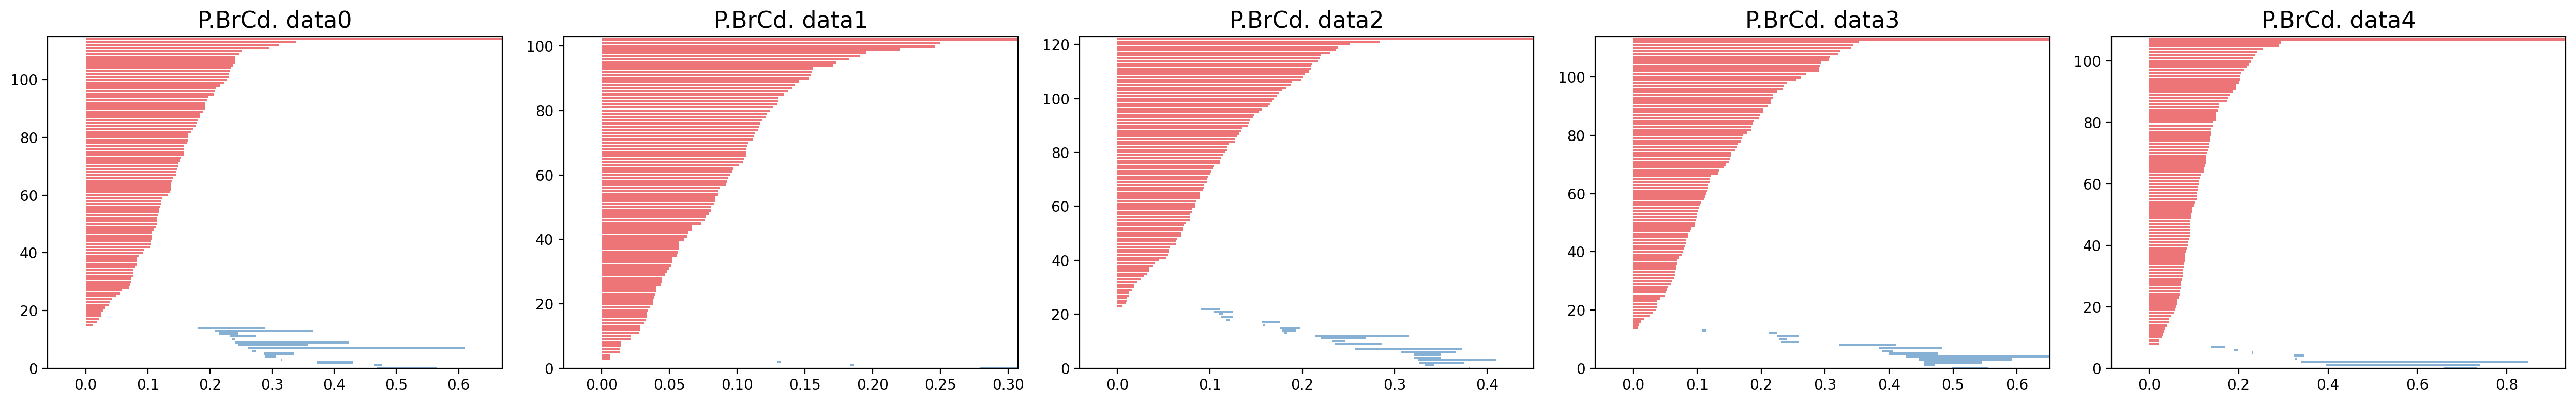

In [10]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_barcode(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.BrCd. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

/home/andreag/anaconda3/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)
/home/andreag/anaconda3/lib/python3.7/site-packages/gudhi/persistence_graphical_tools.py:510: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap)
/home/andreag/anaconda3/lib/python3.7/site-packages/gudh

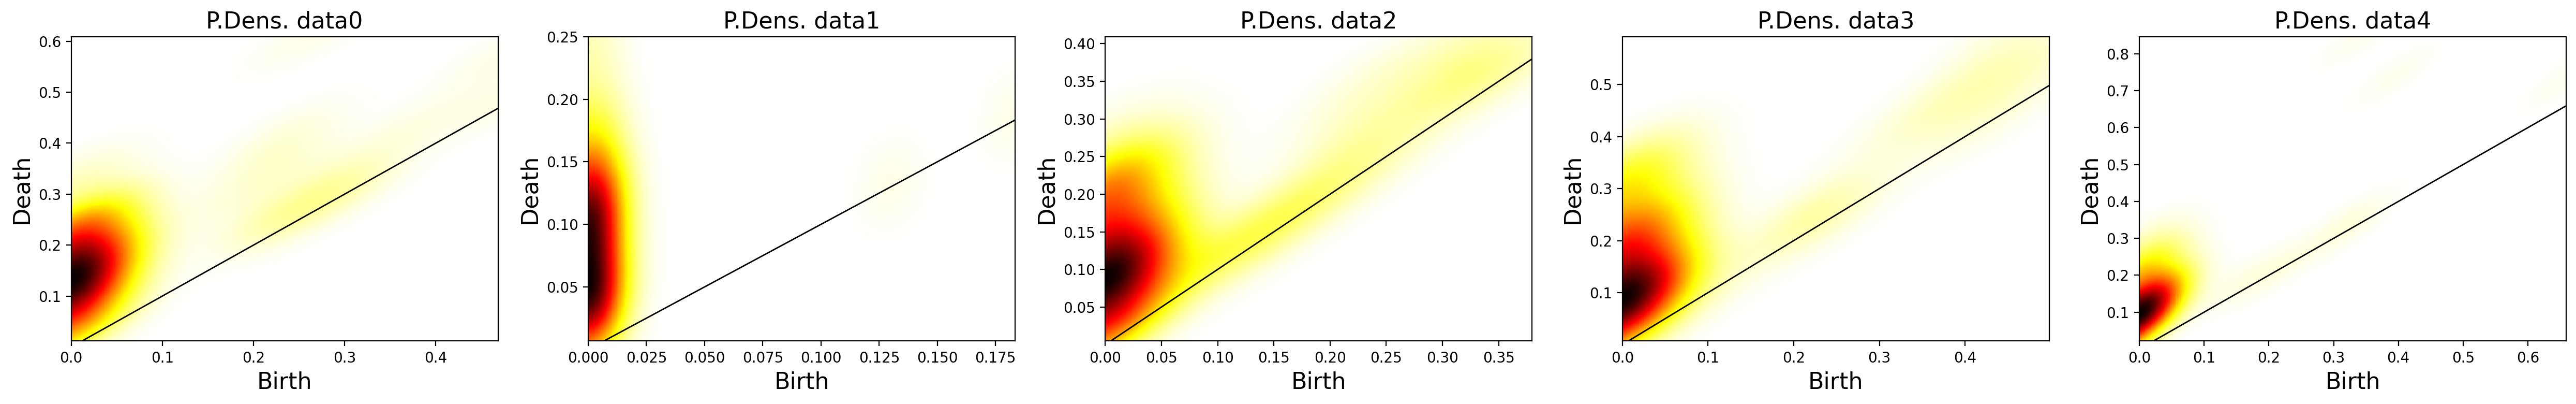

In [11]:
fig, ax = myplt.get_axes(len(files_list), max_col=5, res=200)
for i,j in enumerate(barCodes):
    gd.plot_persistence_density(barCodes[j], axes=ax[i])
    ax[i].set_title(r'P.Dens. data'+str(i), size=16)
#     ax[i].set_xlabel(r'Birth', size=16)
#     ax[i].set_ylabel(r'Death', size=16)
fig.tight_layout()

In [28]:
def get_filtration(data,VRcomplex,r):
    filtration_ = list()
    for i in VRcomplex.get_filtration():
        if i[1] != 0.0 and i[1] <= r:
            filtration_.append(i[0])
    return [tuple(i) for i in filtration_]

def plt_filtration(data,filtration,axes=None):
    Npoints = len(data)
    G = nx.Graph()
    G.add_nodes_from(np.arange(Npoints))
    for node_tuple in filtration:
        G.add_edges_from(itertools.combinations_with_replacement(node_tuple, 2))
    
    nx.draw(G, pos=data,
            node_size=50, node_color='tab:green',
            width=1.0, edge_color='tab:blue',
            alpha=1, ax=axes)

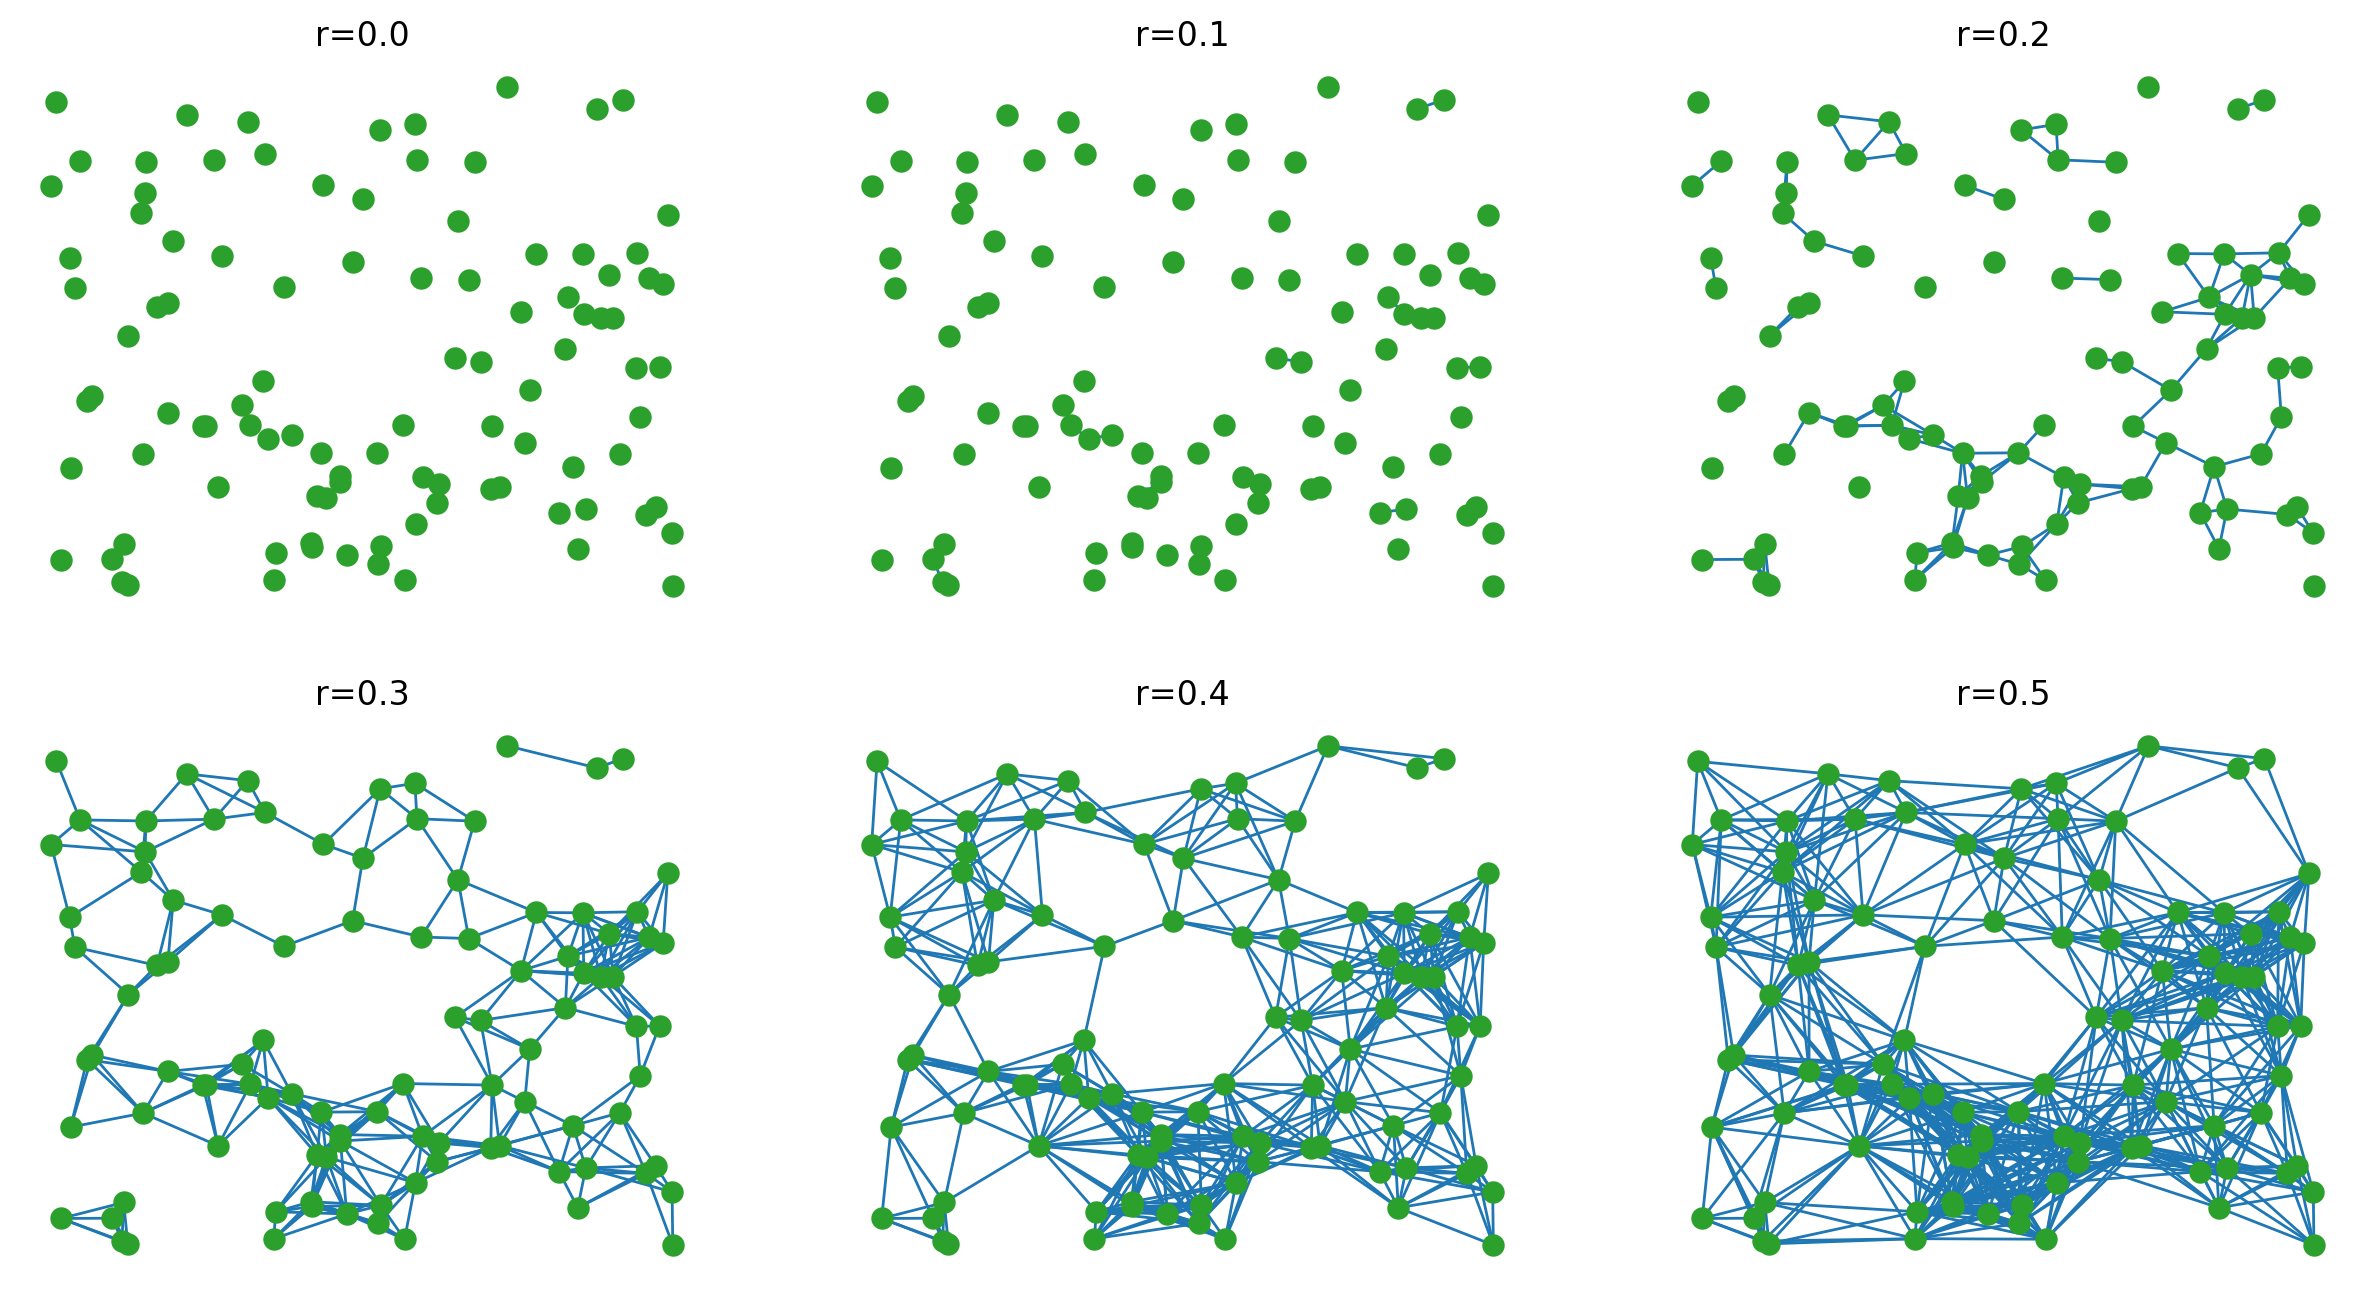

In [32]:
SET = '0'
filtration_cycle = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=3, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    plt_filtration(dataSet['data_'+SET], filtration, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))

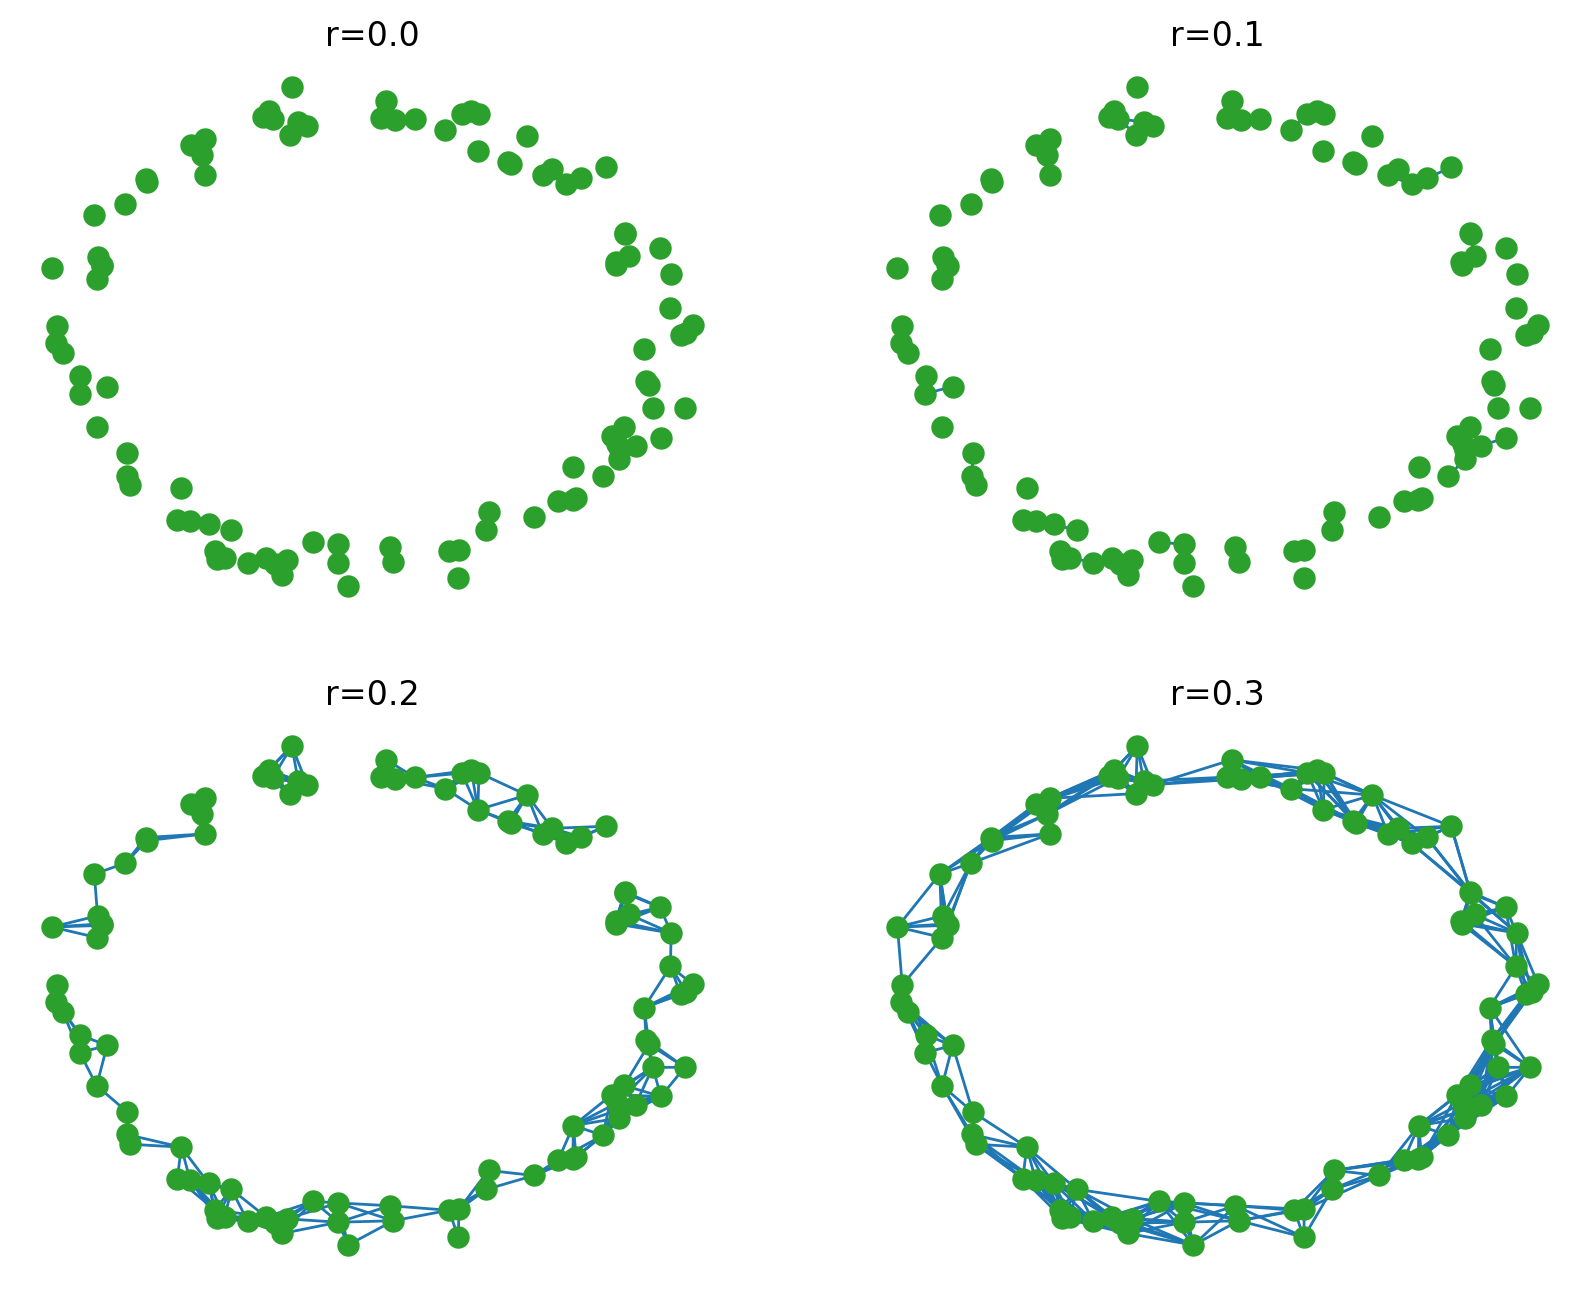

In [35]:
SET = '1'
filtration_cycle = [0.0, 0.1, 0.2, 0.3]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=2, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    plt_filtration(dataSet['data_'+SET], filtration, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))

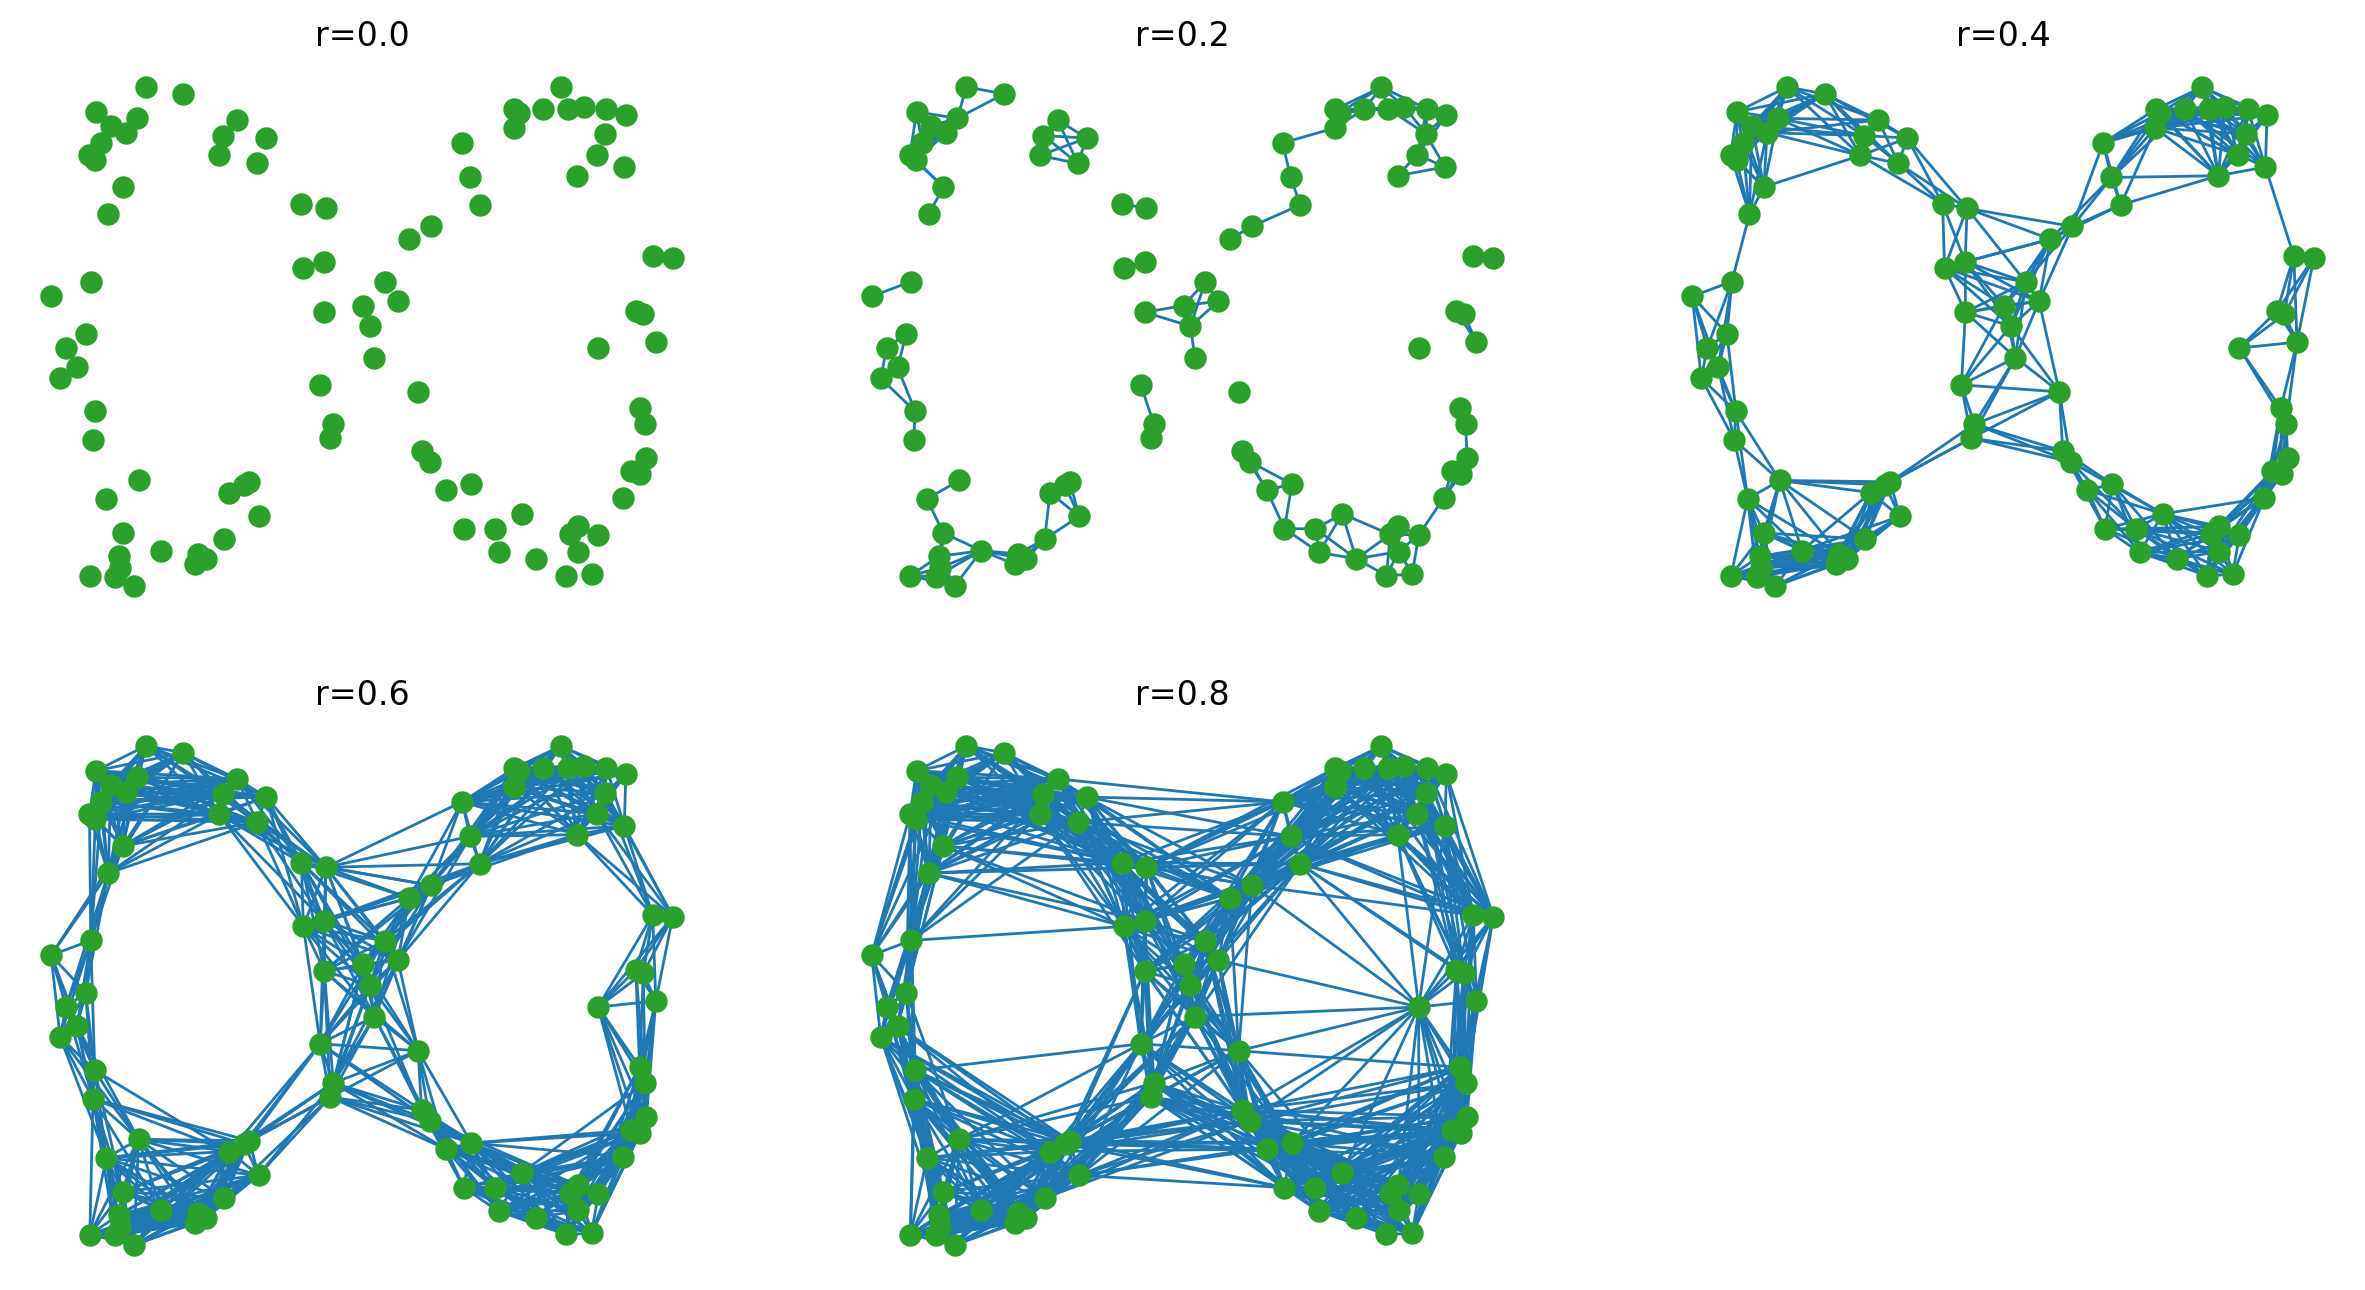

In [34]:
SET = '4'
filtration_cycle = [0.0, 0.2, 0.4, 0.6, 0.8]
fig, ax = myplt.get_axes(len(filtration_cycle), max_col=3, res=200)
for i,fil in enumerate(filtration_cycle):
    filtration = get_filtration(dataSet['data_'+SET],VRcomplexes['VR_'+SET],r=fil)
    plt_filtration(dataSet['data_'+SET], filtration, axes=ax[i])
    ax[i].set_title(r'r='+str(fil))